# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from wordcloud import WordCloud

In [2]:
import missingno as msno

# Data 

In [3]:
ucd = pd.read_csv('Data/laptopData.csv')

In [4]:
data = pd.read_csv('Data/laptopData_cleaned.csv')
data.head(2)

,Company,TypeName,Inches,RAM_GB,GPU,OpSys,Weight_KG,Price_Rupee,CPU_model,CPU_GHz,ScreenRes_width,ScreenRes_height,TouchScreen,Memory_Size1_GB,Memory_Type1,Memory_Size2_GB,Memory_Type2
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,2.3,2560,1600,No,128,SSD,0,No second memory
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,1.8,1440,900,No,128,Flash Storage,0,No second memory


# Visual

- Missing data types plot $\checkmark$
- Histograms $\checkmark$
- Lineplots
- Scatter Plot $\checkmark$
- boxplot
- bar plot
- stacked bar plot
- correlation plot
- pairplot
- Word cloud

## Missing data plot

#### With Seaborn

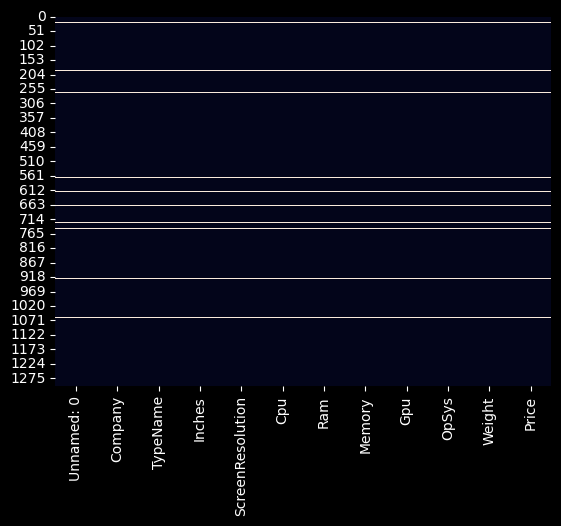

In [5]:
sns.heatmap(ucd.isnull(), cbar=False)
plt.show()

### with missingno

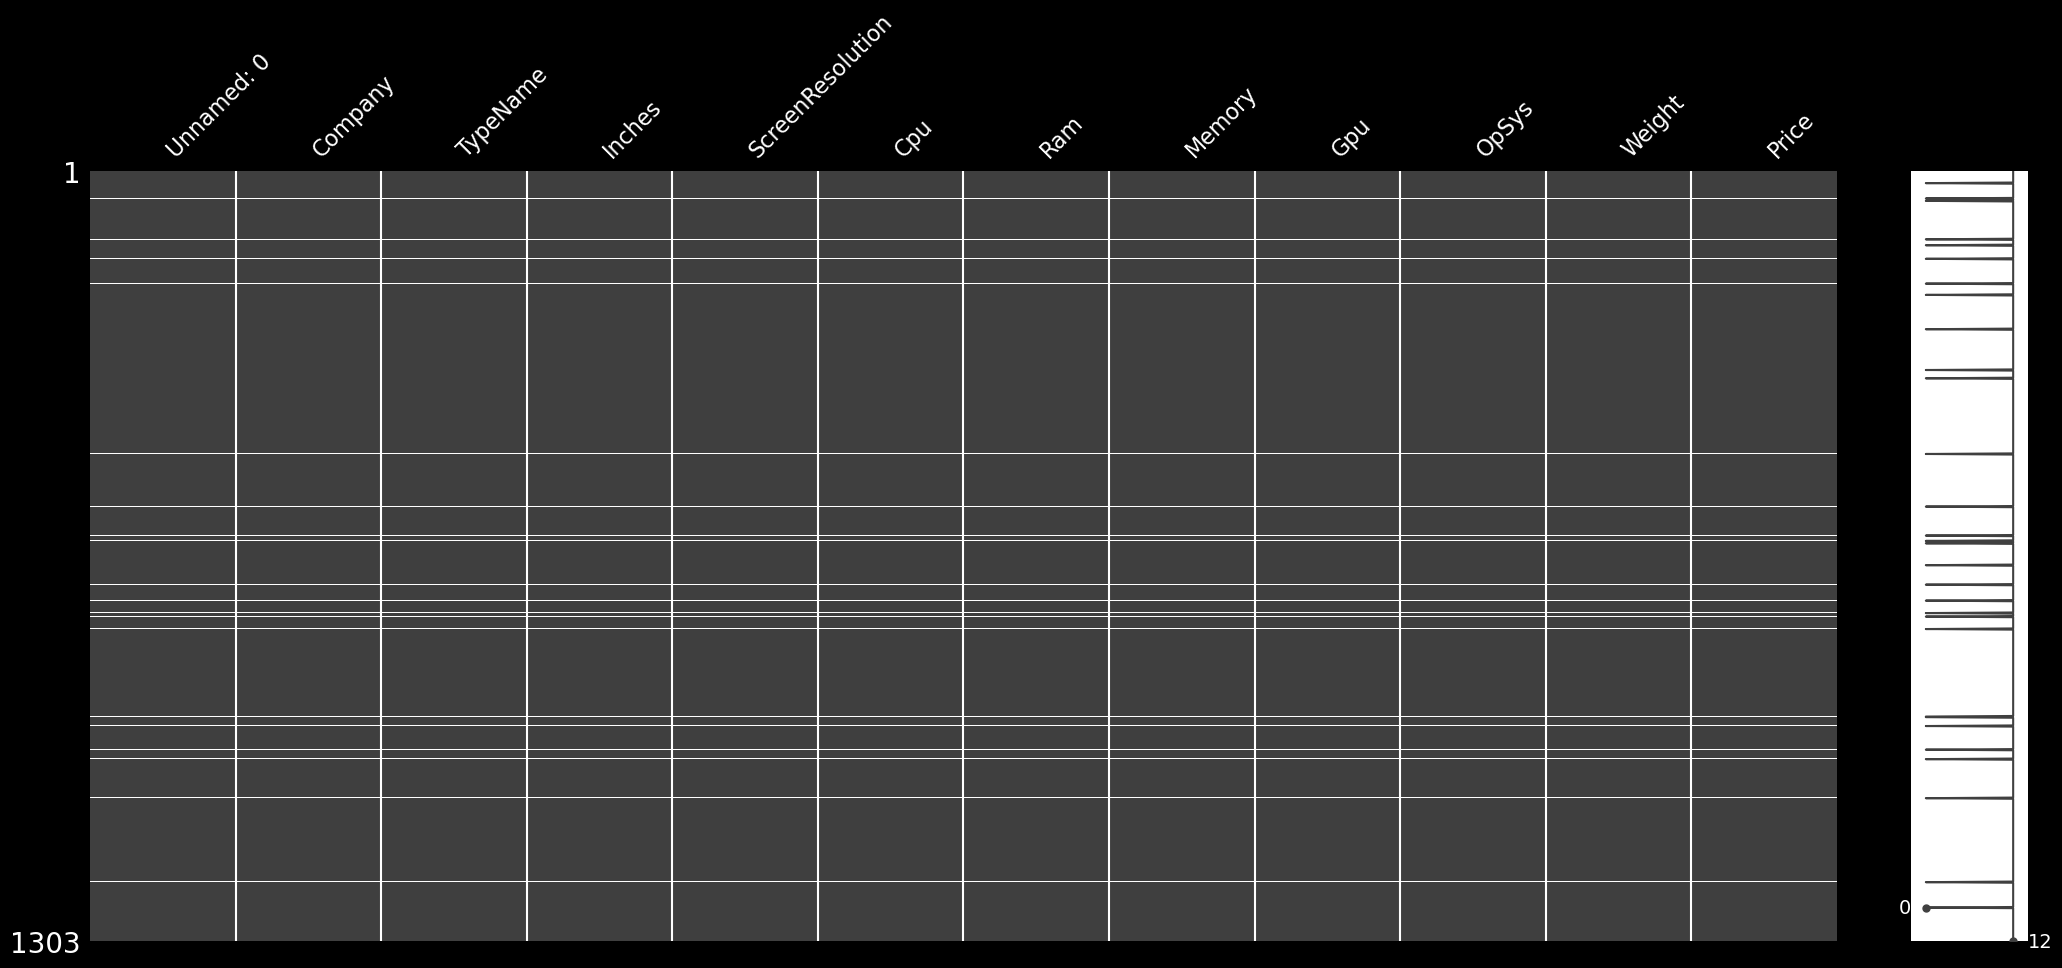

In [9]:
msno.matrix(ucd)
plt.show()

## Histograms

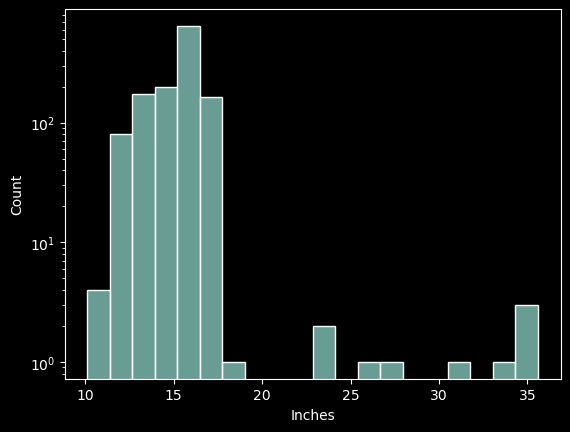

In [13]:
sns.histplot(data=data, x='Inches', bins=20)
plt.yscale('log')
plt.show()

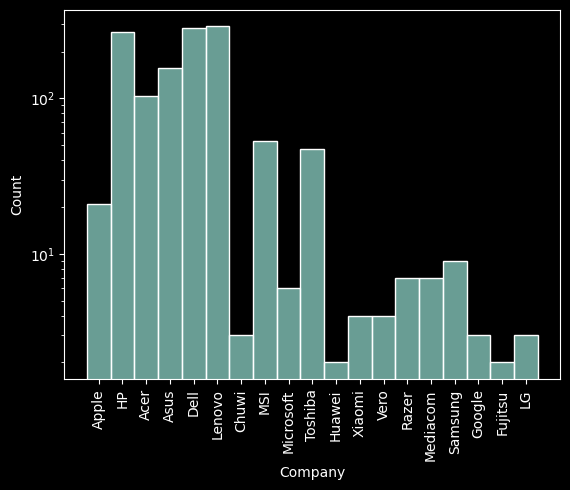

In [17]:
sns.histplot(data=data, x='Company')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

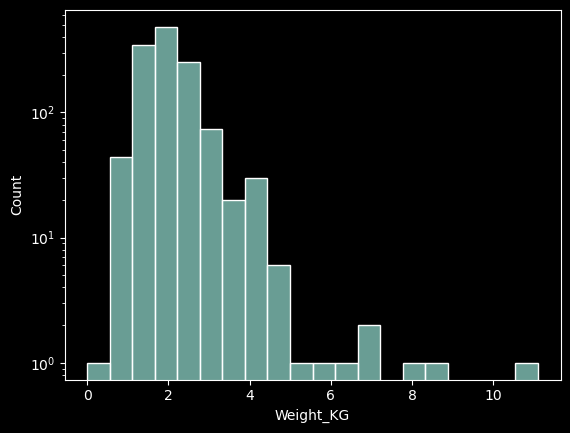

In [20]:
sns.histplot(data=data, x='Weight_KG', bins=20)
plt.yscale('log')
plt.show()

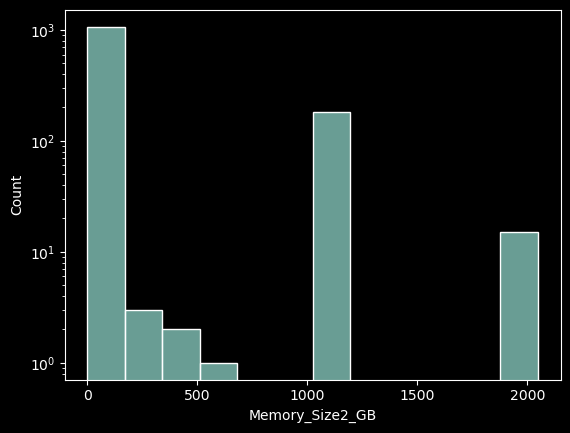

In [23]:
sns.histplot(data=data, x='Memory_Size2_GB')
plt.yscale('log')
plt.show()

## Scatter Plots

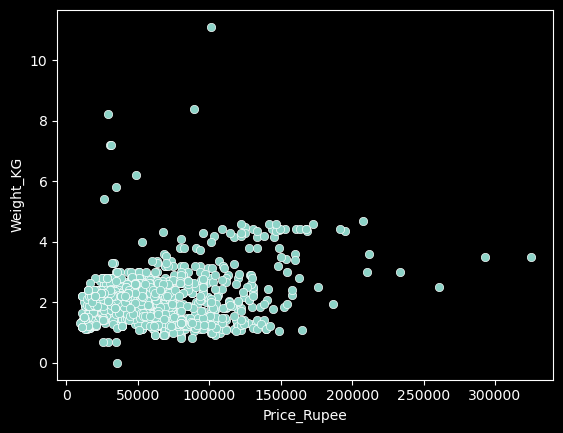

In [10]:
sns.scatterplot(data=data, x='Price_Rupee', y='Weight_KG')
plt.show()

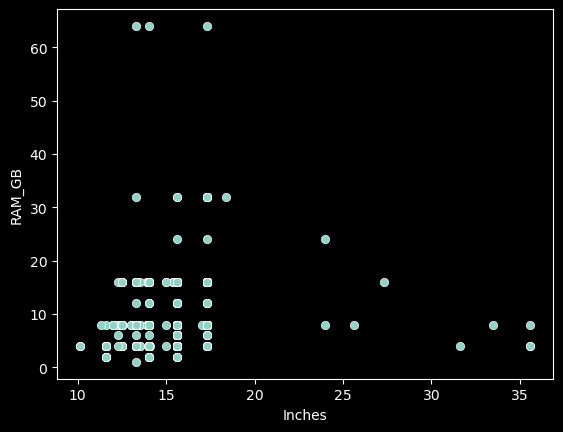

In [8]:
sns.scatterplot(data=data, x='Inches', y='RAM_GB')
plt.show()

## Box plot

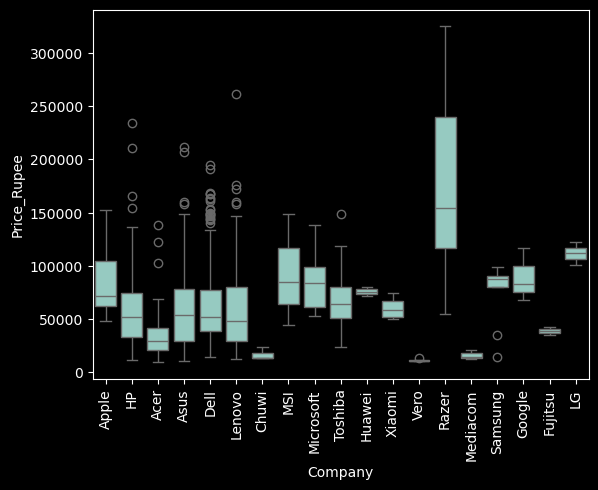

In [11]:
sns.boxplot(data=data, x='Company', y='Price_Rupee')
plt.xticks(rotation=90)
plt.show()

## Bar plot

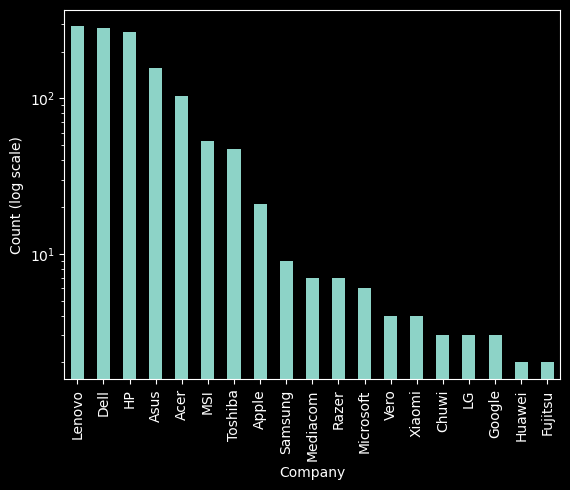

In [15]:
data['Company'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.yscale('log')
plt.xlabel('Company')
plt.ylabel('Count (log scale)')
plt.show()

## Stacked Bar Plot

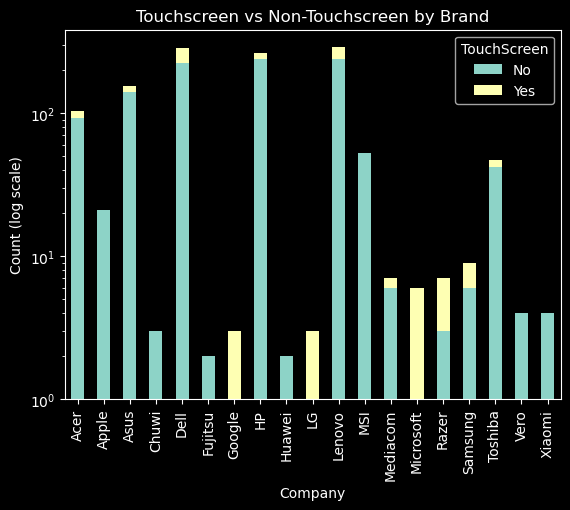

In [18]:
pd.crosstab(data['Company'], data['TouchScreen']).plot(kind='bar', stacked=True)
plt.title("Touchscreen vs Non-Touchscreen by Brand")
plt.yscale('log')
plt.ylabel('Count (log scale)')
plt.show()

## Correlation Heatmap

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1271 non-null   object 
 1   TypeName          1271 non-null   object 
 2   Inches            1271 non-null   float64
 3   RAM_GB            1271 non-null   int64  
 4   GPU               1271 non-null   object 
 5   OpSys             1271 non-null   object 
 6   Weight_KG         1271 non-null   float64
 7   Price_Rupee       1271 non-null   float64
 8   CPU_model         1271 non-null   object 
 9   CPU_GHz           1271 non-null   float64
 10  ScreenRes_width   1271 non-null   int64  
 11  ScreenRes_height  1271 non-null   int64  
 12  TouchScreen       1271 non-null   object 
 13  Memory_Size1_GB   1271 non-null   int64  
 14  Memory_Type1      1271 non-null   object 
 15  Memory_Size2_GB   1271 non-null   int64  
 16  Memory_Type2      1271 non-null   object 


In [22]:
cols = ['Inches', 'RAM_GB', 'Weight_KG', 'Price_Rupee','CPU_GHz', 'Memory_Size1_GB', 'Memory_Size2_GB']

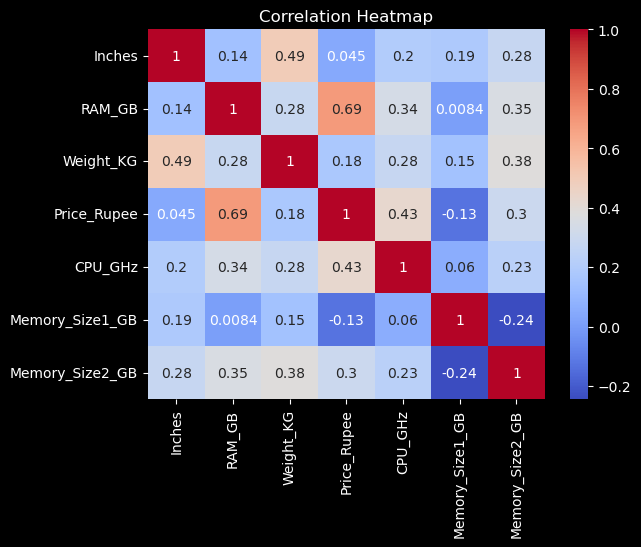

In [23]:
sns.heatmap(data[cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Pairplot

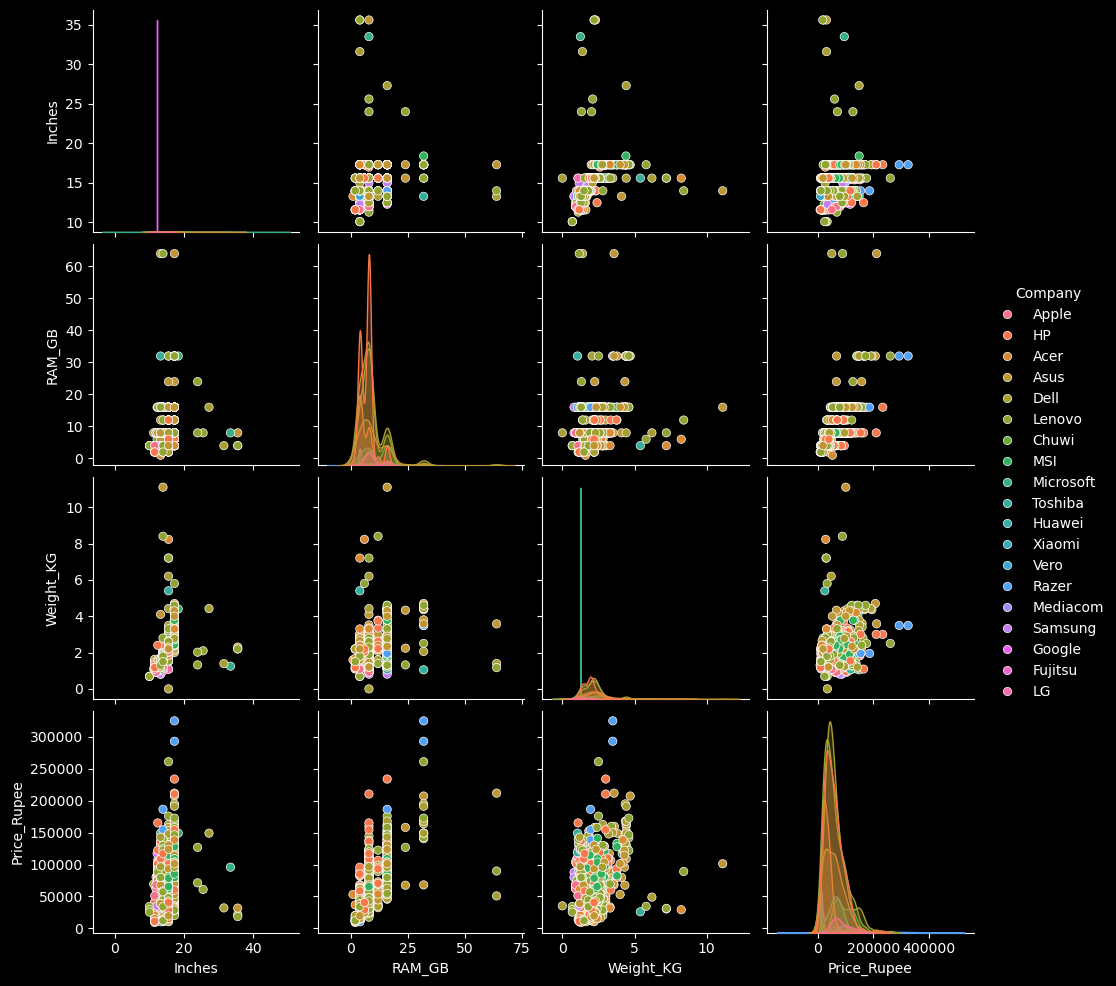

In [29]:
sns.pairplot(data[cols[:4] + ['Company']], hue='Company')
plt.show()

## Word Cloud

In [31]:
data.columns

Index(['Company', 'TypeName', 'Inches', 'RAM_GB', 'GPU', 'OpSys', 'Weight_KG',
       'Price_Rupee', 'CPU_model', 'CPU_GHz', 'ScreenRes_width',
       'ScreenRes_height', 'TouchScreen', 'Memory_Size1_GB', 'Memory_Type1',
       'Memory_Size2_GB', 'Memory_Type2'],
      dtype='object')

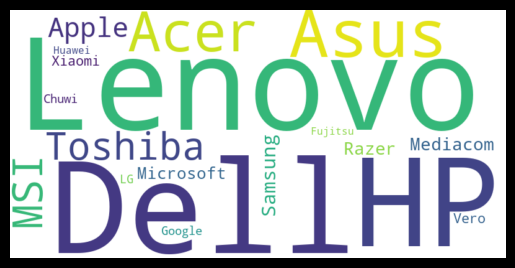

In [33]:
company = " ".join(data['Company'])
wc_c = WordCloud(width=800, height=400, background_color='white').generate(company)

plt.imshow(wc_c, interpolation='bilinear')
plt.axis('off')
plt.show()